In [1]:
from cpp_algorithms import wavefront 

# For testing purposes
from cpp_algorithms.common_helpers import get_all_area_maps
from cpp_algorithms.common_helpers import imshow, imshow_scatter
from cpp_algorithms.common_helpers import get_random_coords
from cpp_algorithms.dist_fill import dist_fill

In [2]:
area_maps = get_all_area_maps("./test_maps/")

CPU times: user 4.27 s, sys: 55.7 ms, total: 4.33 s
Wall time: 4.59 s


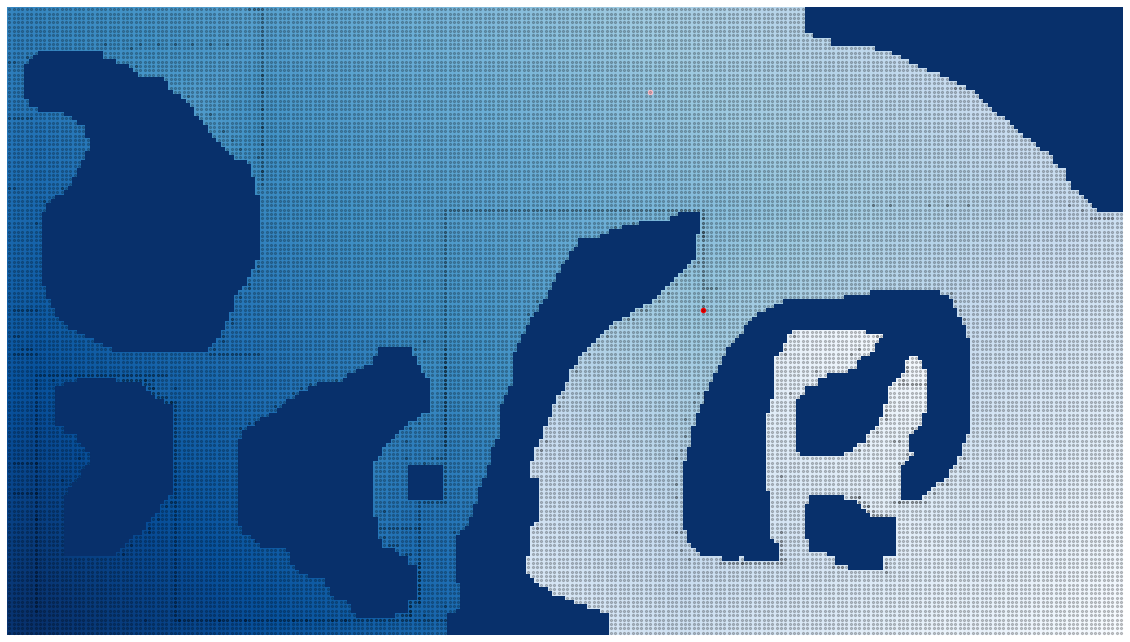

In [3]:
"""
Running the algorithm; all parameters of the 
wavefront function are optional except for 
area_map and start_point
"""

# wavefront(area_map, start_point)

area_map = area_maps[16]
start_point = get_random_coords(area_map, 1)[0]
center_point = get_random_coords(area_map, 1)[0]

%time full_path = wavefront(area_map, start_point, center_point)

end_point = full_path[-1]
imshow(dist_fill(area_map,[center_point]), figsize=(20,20), cmap="Blues_r")
imshow_scatter([start_point], "pink", 1)
imshow_scatter([end_point], "red", 1)
imshow_scatter(full_path, "black", 0.2, 5)

# Tests

Tests pertaining specifically to the Wavefront algorithm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cpp_algorithms.common_helpers import generate_no_obs_area_map
from cpp_algorithms.coverage_path.pathing_helpers import has_isolated_areas
from cpp_algorithms.coverage_path.wavefront.wavefront_caller import wavefront_caller
from cpp_algorithms.coverage_path.wavefront.wavefront_helpers import get_replacement_paths_l1

In [7]:
def bt_len(backtrack_paths):
    return np.sum([len(bt) for bt in backtrack_paths])

def print_map(area_map):
    for i in area_map:
        for j in i:
            print(f"{j}".rjust(3),end="")
        print()
        
def single_test(area_map):
    start_point = get_random_coords(area_map, 1)[0]
    center_point = get_random_coords(area_map,1)[0]
    
    dist_map = dist_fill(area_map,[center_point])
    print("sp",start_point, "cp",center_point)
    coverage_path , backtrack_paths, backtrack_starts = wavefront_caller(area_map, start_point, center_point)
    imshow(dist_map, cmap="Blues_r", figsize=(20,20))
    cp_end = coverage_path[-1]
    
    imshow_scatter([start_point], color="black")
    imshow_scatter([center_point], color="green")
    imshow_scatter([cp_end], color="red")
    
    imshow_scatter(coverage_path, "black", 0.2, 2) # Main Path
    replacement_paths = get_replacement_paths_l1(backtrack_paths, area_map)
    for rep_path in replacement_paths: 
        imshow_scatter(rep_path, "orange", 0.8, 4) # Backtrack Paths
    print(f"backtrack length : {bt_len(backtrack_paths)}, coverage length : {len(coverage_path)}")
    print(f"replacement length : {bt_len(replacement_paths)}")

sp (16, 14) cp (44, 130)
backtrack length : 7631, coverage length : 3680
replacement length : 588
CPU times: user 663 ms, sys: 8.11 ms, total: 672 ms
Wall time: 683 ms


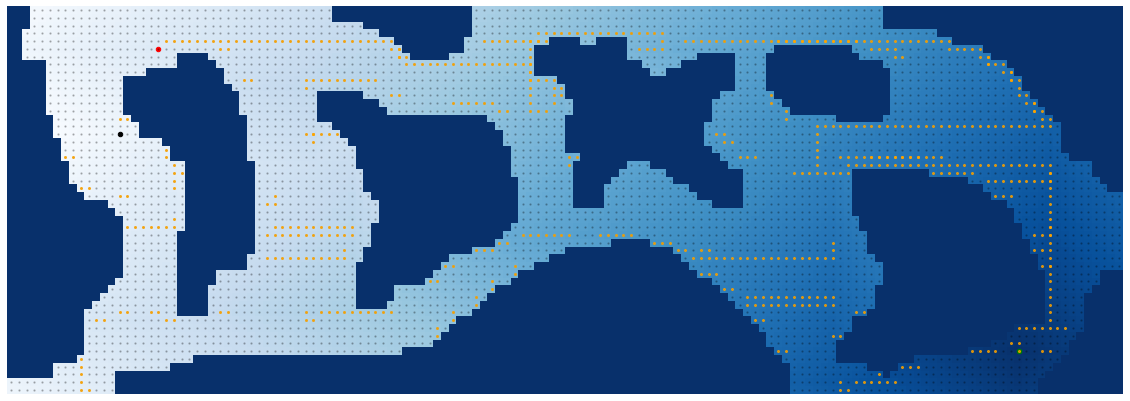

In [10]:
%time single_test(area_maps[13])

In [8]:
for i, area_map in enumerate(area_maps):
    start_point = get_random_coords(area_map, 1)[0]
    center_point = get_random_coords(area_map,1)[0]

    print(f"# Area Map : {i} , area : {(area_map==0).sum()}\nshape : {area_map.shape}, size : {area_map.size}")
    print(f"start_point : {start_point}, center_point: {center_point}")
    print(f"\nISOLATED AREA CHECK TIME")
    %time has_isolated = has_isolated_areas(area_map)
    if has_isolated:
        print("isolated area present, algo won't work")
        print()
        print("-"*42)
        continue

    print(f"\nCOVERAGE PATH GENERATION TIME")
    %time coverage_path , backtrack_paths, backtrack_starts = wavefront_caller(area_map, start_point, center_point)

    print(f"\nREPLACEMENT PATH GENERATION TIME")
    %time replacement_paths = get_replacement_paths_l1(backtrack_paths, area_map)

    print(f"cp len : {len(coverage_path)}, bt len : {bt_len(backtrack_paths)}, rp len : {bt_len(replacement_paths)}")
    print()
    print("-"*42)
    print()
#     input()

del i, area_map, start_point, center_point, has_isolated
del coverage_path, backtrack_paths, backtrack_starts, replacement_paths

# Area Map : 0 , area : 716
shape : (32, 32), size : 1024
start_point : (27, 20), center_point: (1, 10)

ISOLATED AREA CHECK TIME
CPU times: user 12.9 ms, sys: 690 µs, total: 13.6 ms
Wall time: 13.5 ms

COVERAGE PATH GENERATION TIME
CPU times: user 63 ms, sys: 1.46 ms, total: 64.4 ms
Wall time: 66 ms

REPLACEMENT PATH GENERATION TIME
CPU times: user 14 ms, sys: 641 µs, total: 14.7 ms
Wall time: 18.2 ms
cp len : 716, bt len : 987, rp len : 65

------------------------------------------

# Area Map : 1 , area : 689
shape : (32, 32), size : 1024
start_point : (22, 4), center_point: (11, 1)

ISOLATED AREA CHECK TIME
CPU times: user 8.94 ms, sys: 262 µs, total: 9.2 ms
Wall time: 13 ms

COVERAGE PATH GENERATION TIME
CPU times: user 32.8 ms, sys: 922 µs, total: 33.8 ms
Wall time: 36.9 ms

REPLACEMENT PATH GENERATION TIME
CPU times: user 15.8 ms, sys: 695 µs, total: 16.5 ms
Wall time: 17.8 ms
cp len : 689, bt len : 176, rp len : 77

------------------------------------------

# Area Map : 2 , 

CPU times: user 1.73 s, sys: 7.06 ms, total: 1.74 s
Wall time: 1.75 s
cp len : 25866, bt len : 78290, rp len : 1829

------------------------------------------

# Area Map : 17 , area : 36713
shape : (144, 256), size : 36864
start_point : (130, 65), center_point: (70, 36)

ISOLATED AREA CHECK TIME
CPU times: user 600 ms, sys: 2.96 ms, total: 603 ms
Wall time: 607 ms

COVERAGE PATH GENERATION TIME
CPU times: user 1.36 s, sys: 4.9 ms, total: 1.36 s
Wall time: 1.37 s

REPLACEMENT PATH GENERATION TIME
CPU times: user 1.12 s, sys: 3.74 ms, total: 1.13 s
Wall time: 1.13 s
cp len : 36713, bt len : 1745, rp len : 394

------------------------------------------

# Area Map : 18 , area : 24720
shape : (144, 256), size : 36864
start_point : (106, 14), center_point: (44, 49)

ISOLATED AREA CHECK TIME
CPU times: user 314 ms, sys: 2.47 ms, total: 317 ms
Wall time: 318 ms

COVERAGE PATH GENERATION TIME
CPU times: user 1.29 s, sys: 5.56 ms, total: 1.3 s
Wall time: 1.3 s

REPLACEMENT PATH GENERATION TI